<a href="https://colab.research.google.com/github/Shambhogit/DL/blob/main/Pretrained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle


In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'shambhojaybhaye1001'
os.environ['KAGGLE_KEY'] = '992142560ab57738965803a66785ef04'


In [ ]:
!kaggle datasets download -d die9origephit/nike-adidas-and-converse-imaged


Dataset URL: https://www.kaggle.com/datasets/die9origephit/nike-adidas-and-converse-imaged
License(s): CC0-1.0


In [ ]:
!unzip nike-adidas-and-converse-imaged.zip -d /content/dataset/


Archive:  nike-adidas-and-converse-imaged.zip
  inflating: /content/dataset/test/adidas/0.jpg  
  inflating: /content/dataset/test/adidas/1.jpg  
  inflating: /content/dataset/test/adidas/10.jpg  
  inflating: /content/dataset/test/adidas/11.jpg  
  inflating: /content/dataset/test/adidas/12.jpg  
  inflating: /content/dataset/test/adidas/13.jpg  
  inflating: /content/dataset/test/adidas/14.jpg  
  inflating: /content/dataset/test/adidas/15.jpg  
  inflating: /content/dataset/test/adidas/16.jpg  
  inflating: /content/dataset/test/adidas/17.jpg  
  inflating: /content/dataset/test/adidas/18.jpg  
  inflating: /content/dataset/test/adidas/19.jpg  
  inflating: /content/dataset/test/adidas/2.jpg  
  inflating: /content/dataset/test/adidas/20.jpg  
  inflating: /content/dataset/test/adidas/21.jpg  
  inflating: /content/dataset/test/adidas/22.jpg  
  inflating: /content/dataset/test/adidas/23.jpg  
  inflating: /content/dataset/test/adidas/24.jpg  
  inflating: /content/dataset/test/adid

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for the train and test datasets
train_dir = '/content/dataset/train'  # Adjust the path based on your folder structure
test_dir = '/content/dataset/test'

# Create ImageDataGenerators for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the images to the range [0, 1]
    shear_range=0.2,  # Random shear transformations
    zoom_range=0.2,   # Random zoom
    horizontal_flip=True  # Random horizontal flip
)

test_datagen = ImageDataGenerator(rescale=1./255)  # For testing, only rescale

# Load the images using the data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224x224 (the input size for most models)
    batch_size=32,
    class_mode='categorical'  # For multi-class classification
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 711 images belonging to 3 classes.
Found 114 images belonging to 3 classes.


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the VGG16 model without the top layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in VGG16
for layer in vgg16_base.layers:
    layer.trainable = False

# Add custom classifier layers
vgg16_model = models.Sequential([
    vgg16_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_vgg16 = vgg16_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 471s 21s/step - accuracy: 0.3701 - loss: 1.0959 - val_accuracy: 0.6042 - val_loss: 0.9742
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.6875 - loss: 0.9857 - val_accuracy: 0.5104 - val_loss: 0.9697
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 501s 22s/step - accuracy: 0.5116 - loss: 0.9725 - val_accuracy: 0.4688 - val_loss: 0.9743
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.5000 - loss: 0.9702 - val_accuracy: 0.5000 - val_loss: 0.9590
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 561s 23s/step - accuracy: 0.6335 - loss: 0.9058 - val_accuracy: 0.7188 - val_loss: 0.8269


In [ ]:
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model without the top layers
resnet50_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in ResNet50
for layer in resnet50_base.layers:
    layer.trainable = False

# Add custom classifier layers
resnet50_model = models.Sequential([
    resnet50_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_resnet50 = resnet50_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 152s 7s/step - accuracy: 0.3378 - loss: 1.1523 - val_accuracy: 0.4792 - val_loss: 1.0711
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.3438 - loss: 1.1375 - val_accuracy: 0.4688 - val_loss: 1.0773
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 142s 6s/step - accuracy: 0.3880 - loss: 1.0973 - val_accuracy: 0.4583 - val_loss: 1.0551
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3125 - loss: 1.0916 - val_accuracy: 0.4271 - val_loss: 1.0490
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 203s 8s/step - accuracy: 0.3970 - loss: 1.0965 - val_accuracy: 0.3854 - val_loss: 1.1166


In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Load the EfficientNetB0 model without the top layers
efficientnet_base = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in EfficientNetB0
for layer in efficientnet_base.layers:
    layer.trainable = False

# Add custom classifier layers
efficientnet_model = models.Sequential([
    efficientnet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Output layer for 3 classes
])

# Compile the model
efficientnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_efficientnet = efficientnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.3934 - loss: 1.1346 - val_accuracy: 0.3333 - val_loss: 1.1560
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 314ms/step - accuracy: 0.2188 - loss: 1.2395 - val_accuracy: 0.3438 - val_loss: 1.1534
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.3537 - loss: 1.1269 - val_accuracy: 0.3125 - val_loss: 1.1407
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 349ms/step - accuracy: 0.3438 - loss: 1.1652 - val_accuracy: 0.3125 - val_loss: 1.1208
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - accuracy: 0.3451 - loss: 1.1228 - val_accuracy: 0.3333 - val_loss: 1.1094


In [ ]:
import tensorflow as tf

# Unfreeze the top layers of VGG16 for fine-tuning
for layer in vgg16_base.layers[15:]:  # Fine-tuning the top layers
    layer.trainable = True

# Compile the model with a lower learning rate
vgg16_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history_vgg16_finetune = vgg16_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 552s 25s/step - accuracy: 0.6409 - loss: 0.7953 - val_accuracy: 0.7500 - val_loss: 0.6086
Epoch 2/5
 1/22 ━━━━━━━━━━━━━━━━━━━━ 8:03 23s/step - accuracy: 0.6875 - loss: 0.5648

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


22/22 ━━━━━━━━━━━━━━━━━━━━ 79s 3s/step - accuracy: 0.6875 - loss: 0.5648 - val_accuracy: 0.8021 - val_loss: 0.4715
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 545s 25s/step - accuracy: 0.8412 - loss: 0.4161 - val_accuracy: 0.9167 - val_loss: 0.2947
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 0.9062 - loss: 0.2996 - val_accuracy: 0.8854 - val_loss: 0.3740
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 603s 25s/step - accuracy: 0.9255 - loss: 0.2458 - val_accuracy: 0.9062 - val_loss: 0.3055


In [ ]:
# Unfreeze the top layers of ResNet50 for fine-tuning
for layer in resnet50_base.layers[100:]:  # Fine-tuning the top layers
    layer.trainable = True

# Compile the model with a lower learning rate
resnet50_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history_resnet50_finetune = resnet50_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 330s 14s/step - accuracy: 0.3568 - loss: 1.1651 - val_accuracy: 0.5000 - val_loss: 1.0343
Epoch 2/5
 1/22 ━━━━━━━━━━━━━━━━━━━━ 4:29 13s/step - accuracy: 0.4688 - loss: 1.0647

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


22/22 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.4688 - loss: 1.0647 - val_accuracy: 0.4583 - val_loss: 1.0383
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 381s 16s/step - accuracy: 0.5519 - loss: 0.9415 - val_accuracy: 0.3958 - val_loss: 1.0446
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.3125 - loss: 1.1212 - val_accuracy: 0.3750 - val_loss: 1.0521
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 321s 15s/step - accuracy: 0.6420 - loss: 0.8129 - val_accuracy: 0.5312 - val_loss: 1.0029


In [ ]:
# Unfreeze the top layers of EfficientNetB0 for fine-tuning
for layer in efficientnet_base.layers[100:]:  # Fine-tuning the top layers
    layer.trainable = True

# Compile the model with a lower learning rate
efficientnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history_efficientnet_finetune = efficientnet_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 152s 5s/step - accuracy: 0.3491 - loss: 1.1295 - val_accuracy: 0.2917 - val_loss: 1.1098
Epoch 2/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 322ms/step - accuracy: 0.3750 - loss: 1.1047 - val_accuracy: 0.3333 - val_loss: 1.1118
Epoch 3/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 141s 7s/step - accuracy: 0.4415 - loss: 1.0190 - val_accuracy: 0.3646 - val_loss: 1.1043
Epoch 4/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step - accuracy: 0.2812 - loss: 1.0780 - val_accuracy: 0.3125 - val_loss: 1.1121
Epoch 5/5
22/22 ━━━━━━━━━━━━━━━━━━━━ 142s 7s/step - accuracy: 0.5308 - loss: 0.9804 - val_accuracy: 0.3438 - val_loss: 1.0994


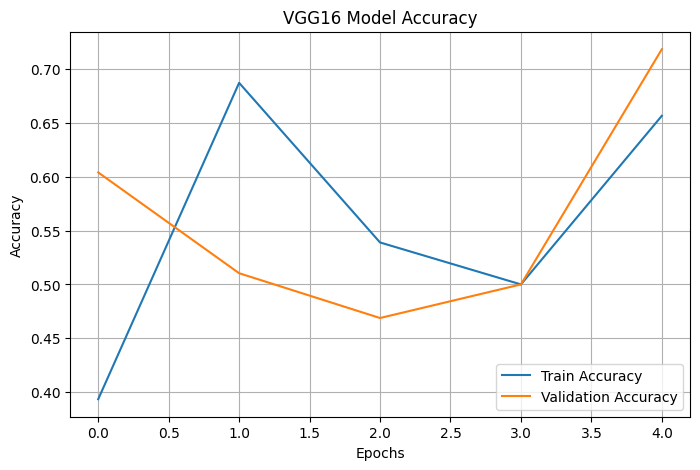

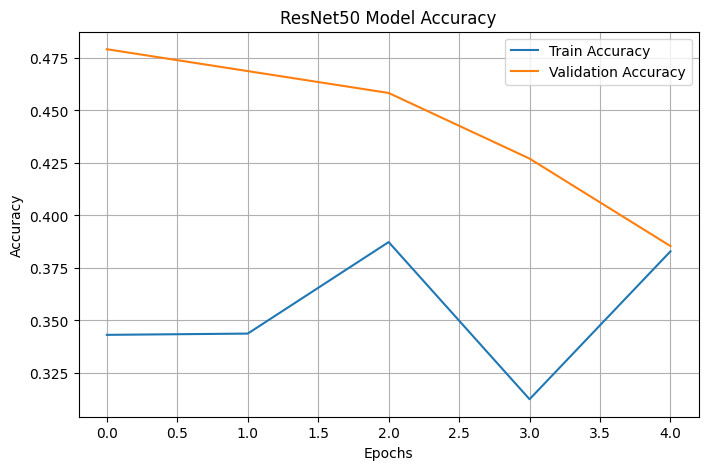

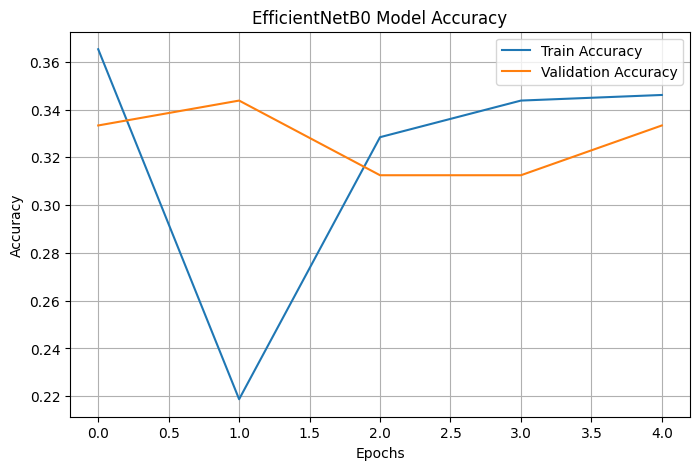

In [ ]:
import matplotlib.pyplot as plt

# VGG16 Accuracy Plot
plt.figure(figsize=(8, 5))
plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# ResNet50 Accuracy Plot
plt.figure(figsize=(8, 5))
plt.plot(history_resnet50.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet50.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# EfficientNetB0 Accuracy Plot
plt.figure(figsize=(8, 5))
plt.plot(history_efficientnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_efficientnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('EfficientNetB0 Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
